# Participant ID:S03

### Content:
- Correlation matrix 
- Comfort Function implementation
- Weather Station Data (During Commuting)
- Weather Station Data (Day of Commuting from 8am to 6pm)
- Living Lab (Day of Commuting from 8am to 6pm)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime


In [2]:
## Read the CSV file into a DataFrame
S03_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/process_data/S03_final_df.csv'

S03_df = pd.read_csv(S03_path, index_col=False, parse_dates=['DateTime'])

In [3]:
S03_df.columns

Index(['DateTime', 'ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn',
       'hrv_rmssd', 'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni',
       'hrv_entropy', 'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum',
       'eda_tonic_energy', 'eda_phasic_mean', 'eda_phasic_std',
       'eda_phasic_sum', 'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min',
       'acc_acc_z_min', 'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max',
       'acc_acc_z_max', 'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp',
       'acc_acc_z_ptp', 'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1',
       'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2',
       'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4',
       'Dewpoint(C)_N4', 'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [4]:
# Set 'DateTime' column as the index
S03_df.set_index('DateTime', inplace=True)

# Group by the unique ID instances
grouped = S03_df.groupby('ID_instance')

# Prepare a list to store the results
results = []

# Iterate through each group
for name, group in grouped:
    # Sort the group by DateTime if not already sorted
    group = group.sort_index()
    
    # Calculate the duration
    start_time = group.index[0]
    end_time = group.index[-1]
    duration = end_time - start_time
    
    # Calculate the min, max, and avg for Temp(C)_N1 and RH(%)_N1
    temp_n1_min = group['Temp(C)_N1'].min()
    temp_n1_max = group['Temp(C)_N1'].max()
    temp_n1_avg = group['Temp(C)_N1'].mean()
    
    rh_n1_min = group['RH(%)_N1'].min()
    rh_n1_max = group['RH(%)_N1'].max()
    rh_n1_avg = group['RH(%)_N1'].mean()
    
    # Append the result to the list
    results.append([name, start_time, end_time, duration, 
                    temp_n1_min, temp_n1_max, temp_n1_avg, 
                    rh_n1_min, rh_n1_max, rh_n1_avg])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['ID_instance', 'Start Time', 'End Time', 'Duration', 
                                            'Min_Temp(C)_N1', 'Max_Temp(C)_N1', 'Avg_Temp(C)_N1',
                                            'Min_RH(%)_N1', 'Max_RH(%)_N1', 'Avg_RH(%)_N1'])

# Print the results as a table
print(results_df)

   ID_instance          Start Time            End Time        Duration  \
0        S03_1 2023-09-07 17:03:12 2023-09-07 18:30:46 0 days 01:27:34   
1       S03_10 2023-09-21 07:46:33 2023-09-21 08:04:57 0 days 00:18:24   
2       S03_11 2023-09-27 17:35:36 2023-09-27 18:04:59 0 days 00:29:23   
3       S03_12 2023-09-28 07:12:14 2023-09-28 07:48:41 0 days 00:36:27   
4       S03_13 2023-09-28 09:49:51 2023-09-28 10:50:59 0 days 01:01:08   
5       S03_14 2023-09-28 16:27:12 2023-09-28 17:20:01 0 days 00:52:49   
6        S03_2 2023-09-08 07:12:16 2023-09-08 07:58:16 0 days 00:46:00   
7        S03_3 2023-09-11 07:33:40 2023-09-11 08:07:52 0 days 00:34:12   
8        S03_4 2023-09-11 16:28:53 2023-09-11 17:05:30 0 days 00:36:37   
9        S03_5 2023-09-12 07:08:31 2023-09-12 07:51:45 0 days 00:43:14   
10       S03_6 2023-09-13 06:16:31 2023-09-13 06:59:02 0 days 00:42:31   
11       S03_7 2023-09-13 16:37:49 2023-09-13 17:39:15 0 days 01:01:26   
12       S03_8 2023-09-14 08:09:37 202

In [5]:
# Group by 'id_instance' and calculate time duration
time_duration = S03_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S03_1     87.57
S03_10    18.40
S03_11    29.38
S03_12    36.45
S03_13    61.13
S03_14    52.82
S03_2     46.00
S03_3     34.20
S03_4     36.62
S03_5     43.23
S03_6     42.52
S03_7     61.43
S03_8     25.33
S03_9     55.03
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_30040\1495514423.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S03_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [ ]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S03_df.drop(S03_df[S03_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [6]:
S03_df.isnull().sum()

ID_instance          13
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [7]:
S03_df.dropna(subset=['ID_instance'], inplace=True)

In [8]:
S03_df['ID_instance'].unique()

array(['S03_1', 'S03_2', 'S03_3', 'S03_4', 'S03_5', 'S03_6', 'S03_7',
       'S03_8', 'S03_9', 'S03_10', 'S03_11', 'S03_12', 'S03_13', 'S03_14'],
      dtype=object)

In [9]:
S03_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [10]:
# Drop columns starting with 'acc_'
S03_df = S03_df.filter(regex='^(?!acc_)')

In [11]:
S03_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [12]:
S03_df.columns[18:30]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

### Correlation matrix

In [13]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S03_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S03_df.columns[18:30] 

# Calculating correlation matrix
correlation_matrix = S03_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,0.241070,-0.086649,0.176278,0.232746,-0.018123,0.158461,0.243283,-0.092112,0.188732,0.052893,-0.058779,0.069601
hrv_lf,0.335914,-0.378403,0.191022,0.383831,-0.326079,0.182356,0.331274,-0.384696,0.249673,0.214379,-0.212758,0.230710
hrv_hf,-0.024051,-0.509388,-0.001898,0.033915,-0.483648,-0.005808,-0.021508,-0.511076,-0.004884,0.392419,-0.397083,0.399656
hrv_sdnn,0.010319,-0.457839,0.086006,0.075817,-0.435408,0.083120,0.009643,-0.461331,0.093060,0.241481,-0.240508,0.250593
hrv_rmssd,0.010343,-0.505997,0.080212,0.066529,-0.469276,0.071886,0.010623,-0.511351,0.080408,0.294563,-0.295355,0.308625
hrv_mean_nni,-0.065102,-0.303038,-0.025257,-0.016521,-0.371236,-0.012339,-0.055902,-0.303314,0.016517,0.133402,-0.126506,0.127436
hrv_median_nni,-0.085438,-0.292403,-0.034595,-0.032962,-0.362813,-0.020271,-0.078572,-0.293693,0.007886,0.123287,-0.114704,0.116761
hrv_range_nni,-0.014858,-0.443654,0.028967,0.031352,-0.409590,0.031266,-0.018112,-0.446579,0.026248,0.285501,-0.279254,0.291530
hrv_entropy,-0.004373,0.348861,-0.137463,-0.051279,0.354505,-0.145718,-0.013530,0.351014,-0.182027,-0.113312,0.108300,-0.111990
eda_tonic_mean,0.064634,0.058585,0.157591,-0.046016,0.129662,0.134577,0.066589,0.035050,0.125434,-0.138746,0.125001,-0.123118


### Correlation heatmap

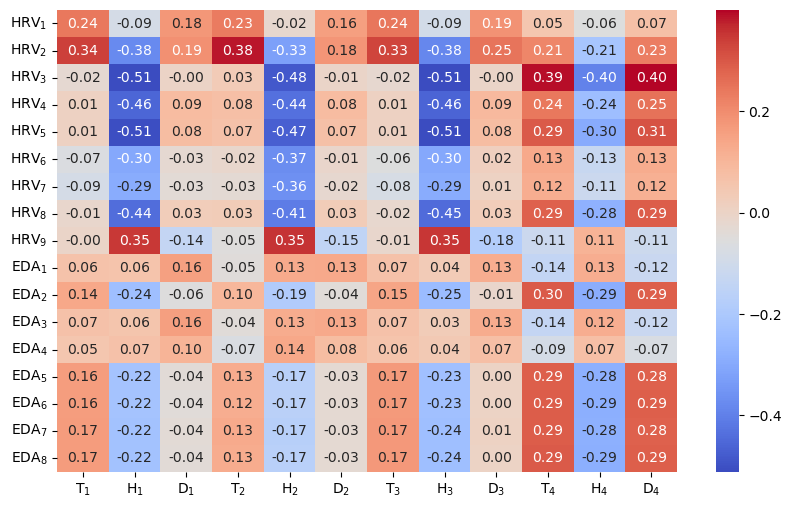

In [14]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S03')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/viz/'
plt.savefig(outpath+'S03_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S03_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = S03_df[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: S03_df[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: S03_df[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [S03_df['Temp(C)_N1'].quantile(0.30), S03_df['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [S03_df['RH(%)_N1'].quantile(0.30), S03_df['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
S03_df['lambda'] = S03_df.apply(comfort_label, axis=1)
label_counts = S03_df['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/final_data/data_S03.pkl'
S03_df.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_hf
EDA Variable: eda_tonic_std
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.0    64.162767
0.5    35.837233
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_30040\3598548706.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S03_df['lambda'] = S03_df.apply(comfort_label, axis=1)


In [16]:
# Group by unique instances
instance_groups = S03_df.groupby('ID_instance')

# Calculate the level of comfort for each instance
comfort_levels = instance_groups['lambda'].mean()  # You can also use .median() or .mode() depending on your preference

# Print the comfort levels
print(comfort_levels)


ID_instance
S03_1     0.000000
S03_10    0.000000
S03_11    0.000000
S03_12    0.000000
S03_13    0.000000
S03_14    0.000000
S03_2     0.500000
S03_3     0.233317
S03_4     0.000000
S03_5     0.484008
S03_6     0.489616
S03_7     0.000000
S03_8     0.500000
S03_9     0.500000
Name: lambda, dtype: float64


### Weather Station Data (During Commuting):

In [17]:
import pandas as pd

# Load the weather data from the uploaded Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
weather_data = pd.read_excel(file_path)

# Display the first few rows of the weather data to understand its structure
weather_data.head()


,Data,Relative Humidity Min (%),Relative Humidity Ave (%),Relative Humidity Max (%),Relative Humidity StDev (%),Air Temperature Min ('C),Air Temperature Ave ('C),Air Temperature Max ('C),Air Temperature StDev ('C),Solar Radiation Min (W/m2),...,Wind direction PrevDir (>),Wind direction RisDir (>),Wind direction RisVel (m/s),Wind direction StdDevDir (>),Wind direction CalmPerc (%),Wind speed Min (m/s),Wind speed Ave (m/s),Wind speed Max (m/s),Wind speed StDev (m/s),Rainfall Tot (mm)
0,2023-07-01 00:00:00,99.40,99.41,99.42,0.0,15.50,15.60,15.69,0.0,0.0,...,298,290,1.0,53,6,0.0,1.3,3.0,0.6,0.0
1,2023-07-01 00:10:00,99.40,99.41,99.41,0.0,15.55,15.65,15.74,0.0,0.0,...,165,155,0.5,69,25,0.0,0.8,1.9,0.5,0.2
2,2023-07-01 00:20:00,99.40,99.41,99.42,0.0,15.60,15.67,15.74,0.0,0.0,...,296,296,0.8,29,29,0.0,0.7,1.5,0.5,0.0
3,2023-07-01 00:30:00,99.40,99.41,99.42,0.0,15.55,15.64,15.75,0.0,0.0,...,333,336,0.6,69,17,0.0,0.8,2.6,0.6,0.0
4,2023-07-01 00:40:00,99.39,99.40,99.40,0.0,15.46,15.51,15.58,0.0,0.0,...,327,324,1.6,20,3,0.0,1.6,2.6,0.6,0.0


In [18]:
# Define the commuting instance data
commuting_data = [
    {"ID_instance": "S03_1", "Start Time" : "2023-09-07 17:03:12", "End Time": "2023-09-07 18:30:46"},
    {"ID_instance": "S03_2", "Start Time" : "2023-09-08 07:12:16", "End Time": "2023-09-08 07:58:16"},
    {"ID_instance": "S03_3", "Start Time" : "2023-09-11 07:33:40", "End Time": "2023-09-11 08:07:52"},
    {"ID_instance": "S03_4", "Start Time" : "2023-09-11 16:28:53", "End Time": "2023-09-11 17:05:30"},
    {"ID_instance": "S03_5", "Start Time" : "2023-09-12 07:08:31", "End Time": "2023-09-12 07:51:45"},
    {"ID_instance": "S03_6", "Start Time" : "2023-09-13 06:16:31", "End Time": "2023-09-13 06:59:02"},
    {"ID_instance": "S03_7", "Start Time" : "2023-09-13 16:37:49", "End Time": "2023-09-13 17:39:15"},
    {"ID_instance": "S03_8", "Start Time" : "2023-09-14 08:09:37", "End Time": "2023-09-14 08:34:57"},
    {"ID_instance": "S03_9", "Start Time" : "2023-09-14 16:50:05", "End Time": "2023-09-14 17:45:07"},
    {"ID_instance": "S03_10", "Start Time": "2023-09-21 07:46:33", "End Time": "2023-09-21 08:04:57"},
    {"ID_instance": "S03_11", "Start Time": "2023-09-27 17:35:36", "End Time": "2023-09-27 18:04:59"},
    {"ID_instance": "S03_12", "Start Time": "2023-09-28 07:12:14", "End Time": "2023-09-28 07:48:41"},
    {"ID_instance": "S03_13", "Start Time": "2023-09-28 09:49:51", "End Time": "2023-09-28 10:50:59"},
    {"ID_instance": "S03_14", "Start Time": "2023-09-28 16:27:12", "End Time": "2023-09-28 17:20:01"}
]

# Convert the commuting instance data to a DataFrame
commuting_df = pd.DataFrame(commuting_data)

# Convert the Start Time and End Time columns to datetime
commuting_df['Start Time'] = pd.to_datetime(commuting_df['Start Time'])
commuting_df['End Time'] = pd.to_datetime(commuting_df['End Time'])

# Display the commuting instance DataFrame
commuting_df.head()


,ID_instance,Start Time,End Time
0,S03_1,2023-09-07 17:03:12,2023-09-07 18:30:46
1,S03_2,2023-09-08 07:12:16,2023-09-08 07:58:16
2,S03_3,2023-09-11 07:33:40,2023-09-11 08:07:52
3,S03_4,2023-09-11 16:28:53,2023-09-11 17:05:30
4,S03_5,2023-09-12 07:08:31,2023-09-12 07:51:45


In [19]:
# Convert the Data column in weather data to datetime
weather_data['Data'] = pd.to_datetime(weather_data['Data'])

# Initialize an empty list to store the results
results = []

# Iterate over each commuting instance
for _, row in commuting_df.iterrows():
    # Filter the weather data within the date-time range of the commuting instance
    mask = (weather_data['Data'] >= row['Start Time']) & (weather_data['Data'] <= row['End Time'])
    filtered_data = weather_data[mask]
    
    # Calculate the average, min, and max for Air Temperature and Relative Humidity 
    min_temp = filtered_data['Air Temperature Min (\'C)'].min()
    max_temp = filtered_data['Air Temperature Max (\'C)'].max()
    avg_temp = filtered_data['Air Temperature Ave (\'C)'].mean()

    min_rh = filtered_data['Relative Humidity Min (%)'].min()
    max_rh = filtered_data['Relative Humidity Max (%)'].max()
    avg_rh = filtered_data['Relative Humidity Ave (%)'].mean()
    
    # min_sr = filtered_data['Solar Radiation Ave (W/m2)'].min()
    # max_sr = filtered_data['Solar Radiation Ave (W/m2)'].max()
    avg_sr = filtered_data['Solar Radiation Ave (W/m2)'].mean()

    # Append the results
    results.append({
        'ID_instance': row['ID_instance'],
        'Min_Air_Temperature': min_temp,
        'Max_Air_Temperature': max_temp,
        'Avg_Air_Temperature': avg_temp,
        'Min_Relative_Humidity': min_rh,
        'Max_Relative_Humidity': max_rh,
        'Avg_Relative_Humidity': avg_rh,
        'Avg_Solar_Radiation': avg_sr
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,ID_instance,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,S03_1,25.34,27.06,26.116667,34.43,37.42,36.042222,276.915556
1,S03_2,19.87,21.19,20.577500,60.48,66.78,63.172500,67.240000
2,S03_3,15.98,18.75,17.473333,63.54,78.94,70.566667,91.533333
3,S03_4,31.14,32.23,31.672500,24.81,26.82,26.060000,453.360000
4,S03_5,15.26,18.57,16.636000,66.09,82.23,76.124000,50.244000
5,S03_6,15.42,16.49,15.812500,70.89,77.35,74.867500,2.880000
6,S03_7,25.38,26.93,26.020000,35.75,40.37,38.335000,267.726667
7,S03_8,19.67,21.95,20.593333,66.38,77.19,73.413333,209.783333
8,S03_9,25.77,27.49,26.366000,40.19,46.30,42.658000,64.440000
9,S03_10,16.56,16.71,16.620000,99.30,99.33,99.315000,55.880000


### Weather Station Data (Day of Commuting from 8am to 6pm):

In [20]:
import pandas as pd

# Load the data from the provided Excel file
file_path = 'C:/Users/Tomar/dev/datasets/weather_summer2023.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Data' column to datetime format
data['Data'] = pd.to_datetime(data['Data'])

# Define the date ranges as given in the task
date_ranges = [
    ("2023-09-07 08:00:00", "2023-09-07 18:00:00"),
    ("2023-09-08 08:00:00", "2023-09-08 18:00:00"),
    ("2023-09-11 08:00:00", "2023-09-11 18:00:00"),
    ("2023-09-12 08:00:00", "2023-09-12 18:00:00"),
    ("2023-09-13 08:00:00", "2023-09-13 18:00:00"),
    ("2023-09-14 08:00:00", "2023-09-14 18:00:00"),
    ("2023-09-21 08:00:00", "2023-09-21 18:00:00"),
    ("2023-09-27 08:00:00", "2023-09-27 18:00:00"),
    ("2023-09-28 08:00:00", "2023-09-28 18:00:00")
]

# Initialize a list to store statistics for each day
daily_statistics = []

# Calculate statistics for each date range
for start, end in date_ranges:
    day_data = data[(data['Data'] >= start) & (data['Data'] <= end)]
    
    stats = {
        'Date Range': f'{start} to {end}',
        'Min_Air_Temperature': day_data["Air Temperature Min ('C)"].min(),
        'Max_Air_Temperature': day_data["Air Temperature Max ('C)"].max(),
        'Avg_Air_Temperature': day_data["Air Temperature Ave ('C)"].mean(),
        'Min_Relative_Humidity': day_data['Relative Humidity Min (%)'].min(),
        'Max_Relative_Humidity': day_data['Relative Humidity Max (%)'].max(),
        'Avg_Relative_Humidity': day_data['Relative Humidity Ave (%)'].mean(),
        'Avg_Solar_Radiation': day_data['Solar Radiation Ave (W/m2)'].mean()
    }
    
    daily_statistics.append(stats)

# Convert the results to a DataFrame for better readability
daily_statistics_df = pd.DataFrame(daily_statistics)
daily_statistics_df


,Date Range,Min_Air_Temperature,Max_Air_Temperature,Avg_Air_Temperature,Min_Relative_Humidity,Max_Relative_Humidity,Avg_Relative_Humidity,Avg_Solar_Radiation
0,2023-09-07 08:00:00 to 2023-09-07 18:00:00,20.66,28.49,25.615410,31.54,63.26,42.017049,655.213443
1,2023-09-08 08:00:00 to 2023-09-08 18:00:00,21.19,29.59,26.678852,32.58,60.84,41.980000,630.621803
2,2023-09-11 08:00:00 to 2023-09-11 18:00:00,18.05,32.23,27.628852,24.81,68.15,37.083934,616.632951
3,2023-09-12 08:00:00 to 2023-09-12 18:00:00,17.34,30.99,26.130328,24.10,72.22,39.060328,608.635246
4,2023-09-13 08:00:00 to 2023-09-13 18:00:00,17.05,26.93,23.350328,35.75,69.53,45.818197,282.343279
5,2023-09-14 08:00:00 to 2023-09-14 18:00:00,19.31,27.88,24.579672,38.98,77.28,50.580492,429.315410
6,2023-09-21 08:00:00 to 2023-09-21 18:00:00,16.60,23.91,20.681186,59.87,99.32,79.314237,369.167119
7,2023-09-27 08:00:00 to 2023-09-27 18:00:00,18.19,27.24,24.150328,30.92,64.01,43.018197,543.802459
8,2023-09-28 08:00:00 to 2023-09-28 18:00:00,17.42,27.70,24.655738,29.94,58.73,40.290656,529.889672


### Living Lab (Day of Commuting from 8am to 6pm):

In [23]:
# Load the CSV file
file_path = 'C:/Users/Tomar/dev/PCM_study/summer_2023/output/living_lab/LL/LL_c.csv'
data = pd.read_csv(file_path)

# Ensure the correct renaming of the 'DateTime' column to 'Timestamp'
data.rename(columns={'DateTime': 'Timestamp'}, inplace=True)

# Convert the 'Timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Define the start and end times for each day
time_intervals = [
    ("2023-09-07 08:00:00", "2023-09-07 18:00:00"),
    ("2023-09-08 08:00:00", "2023-09-08 18:00:00"),
    ("2023-09-11 08:00:00", "2023-09-11 18:00:00"),
    ("2023-09-12 08:00:00", "2023-09-12 18:00:00"),
    ("2023-09-13 08:00:00", "2023-09-13 18:00:00"),
    ("2023-09-14 08:00:00", "2023-09-14 18:00:00"),
    ("2023-09-21 08:00:00", "2023-09-21 18:00:00"),
    ("2023-09-27 08:00:00", "2023-09-27 18:00:00"),
    ("2023-09-28 08:00:00", "2023-09-28 18:00:00")
    
]

# Convert string times to datetime
time_intervals = [(datetime.strptime(start, "%Y-%m-%d %H:%M:%S"), datetime.strptime(end, "%Y-%m-%d %H:%M:%S")) for start, end in time_intervals]

# Initialize a list to store results
results_list = []

# Process each time interval
for start, end in time_intervals:
    # Filter data based on time interval
    filtered_data = data[(data['Timestamp'] >= start) & (data['Timestamp'] <= end)]
    
    # Calculate required metrics
    result = {
        'Start_Time': start,
        'End_Time': end,
        'Min_Temp_Air': filtered_data['Temp_Air(C)_x'].min(),
        'Max_Temp_Air': filtered_data['Temp_Air(C)_x'].max(),
        'Avg_Temp_Air': filtered_data['Temp_Air(C)_x'].mean(),
        'Min_Temp_Globe': filtered_data['Temp_Globe(C)'].min(),
        'Max_Temp_Globe': filtered_data['Temp_Globe(C)'].max(),
        'Avg_Temp_Globe': filtered_data['Temp_Globe(C)'].mean(),
        'Min_Relative_Humidity': filtered_data['RH(%)'].min(),
        'Max_Relative_Humidity': filtered_data['RH(%)'].max(),
        'Mean_Relative_Humidity': filtered_data['RH(%)'].mean(),
        'Illu_min': filtered_data['Illu(lx)'].min(),
        'Illu_max': filtered_data['Illu(lx)'].max(),
        'Illu_avg': filtered_data['Illu(lx)'].mean(),
        'Ele1_sum': filtered_data['Ele1(A)'].sum(),
        'Ele2_sum': filtered_data['Ele2(A)'].sum(),
        'Window_open_percentage': (filtered_data['Window'].sum() / len(filtered_data['Window'])) * 100 if len(filtered_data['Window']) > 0 else 0,
        'Door_open_percentage': (filtered_data['Door'].sum() / len(filtered_data['Door'])) * 100 if len(filtered_data['Door']) > 0 else 0,
    }
    
    # Append result to the list
    results_list.append(result)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Display the results
results_df


,Start_Time,End_Time,Min_Temp_Air,Max_Temp_Air,Avg_Temp_Air,Min_Temp_Globe,Max_Temp_Globe,Avg_Temp_Globe,Min_Relative_Humidity,Max_Relative_Humidity,Mean_Relative_Humidity,Illu_min,Illu_max,Illu_avg,Ele1_sum,Ele2_sum,Window_open_percentage,Door_open_percentage
0,2023-09-07 08:00:00,2023-09-07 18:00:00,24.618896,26.913818,25.717065,-242.455124,-242.455124,-242.455124,40.426464,49.407951,44.906979,15.269470,519.526489,219.734441,43.269341,18.573980,38.333333,87.500000
1,2023-09-08 08:00:00,2023-09-08 18:00:00,25.068604,27.181641,26.249913,-242.455124,-242.455124,-242.455124,43.222828,51.190804,46.175505,19.072914,445.580475,220.430974,28.861603,21.911829,51.666667,81.666667
2,2023-09-11 08:00:00,2023-09-11 18:00:00,24.497070,27.790527,26.017391,-242.455124,-242.455124,-242.455124,37.695560,46.939957,43.006189,64.560509,696.447388,341.918139,31.823070,20.685901,0.000000,50.833333
3,2023-09-12 08:00:00,2023-09-12 18:00:00,22.407471,27.825195,25.853792,-242.455124,-242.455124,-242.455124,35.908669,47.955124,42.226231,35.125732,414.244263,176.375942,29.154259,22.195736,30.000000,87.500000
4,2023-09-13 08:00:00,2023-09-13 18:00:00,24.715088,27.285645,25.938666,-242.455124,-242.455124,-242.455124,39.245300,43.999359,42.368352,27.117157,1045.863892,310.321206,28.347894,21.068964,50.833333,70.833333
5,2023-09-14 08:00:00,2023-09-14 18:00:00,24.773682,28.093262,26.362748,-242.455124,-242.455124,-242.455124,44.873943,53.028290,46.794477,3.696251,659.773254,194.795504,19.997582,18.938248,40.000000,58.333333
6,2023-09-21 08:00:00,2023-09-21 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
7,2023-09-27 08:00:00,2023-09-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
8,2023-09-28 08:00:00,2023-09-28 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
